# MNIST Gradient Descent NNs

## Load Data

In [87]:
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(suppress=True)
np.seterr(divide = 'ignore') 

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# normalisation
X_train = X_train / 255
X_test = X_test / 255

def createY(y):
    Y = np.zeros(10)
    Y[y] = 1
    return Y

# reshape
X_train = X_train.reshape(60000, 28 ** 2)
X_test = X_test.reshape(10000, 28 ** 2)
y_train = np.array([createY(y) for y in y_train])
y_test =np.array([createY(y) for y in y_test])

# tensorflow
X_train = tf.constant(X_train, dtype=tf.float64)
X_test = tf.constant(X_test, dtype=tf.float64)
y_train = tf.constant(y_train, dtype=tf.float64)
y_test = tf.constant(y_test, dtype=tf.float64)

## Initialize HyperParameters

In [88]:
def inistial_parameters(n, dims):
    
    W = {}
    B = {}
    
    for i in range(len(dims)):
        dim = dims[i]
        if i == 0:
            w =  np.random.randn(n, dim) * 1e-2
            W['W' + str(i + 1)] = tf.constant(w)
            b = np.random.randn(1) * 1e-2
            B['b' + str(i + 1)] = tf.constant(b)
        else:
            w = np.random.randn(dims[i-1], dim) * 1e-2
            W['W' + str(i + 1)] = tf.constant(w)
            b = np.random.randn(1) * 1e-2
            B['b' + str(i + 1)] = tf.constant(b)
            
    return {
        'W' : W,
        'b' : B
    }

## Linear Regression

In [89]:
def linear(X, W, b):
    return np.dot(X, W) + b

## ReLU

In [90]:
def relu(X):
    return np.maximum(X, 0)

## Softmax

In [91]:
def softmax(X):
    return (np.exp(X)) / (np.sum(np.exp(X)))

## Activation function

In [92]:
def activation(A_prev, W, b, active):
    """
    activation - sigmoid/relu/softmax
    """
    
    if active == 'sigmoid':
        Z = linear(A_prev, W, b)
        A = sigmoid(Z)
    elif active == 'relu':
        Z = linear(A_prev, W, b)
        A = relu(Z)
    elif active == 'softmax':
        Z = linear(A_prev, W, b)
        A = softmax(Z)
        
    return A, Z

## L model forward

In [93]:
def L_model_forward(X, W, b):
    A = X
    L = len(b)
    caches = {}
    
    caches['A0'] = A
    
    for i in range(1, L):
        A_prev = A
        
        A, Z = activation(A_prev, W['W' + str(i)], b['b' + str(i)], 'relu')
        caches['A' + str(i)] = A
        caches['Z' + str(i)] = Z
        
    AL, ZL = activation(A, W['W' + str(L)], b['b' + str(L)], 'softmax')
    caches['A' + str(L)] = AL
    caches['Z' + str(L)] = ZL
    
    return (AL, caches)

## Train

In [169]:
n = X_train.shape[1]
m = X_train.shape[0]
alpha = 0.5

parameters = inistial_parameters(n, [100, 10])
W = parameters['W']
b = parameters['b']

# AL, caches = L_model_forward(X_train, W, b)

cost_train = []
cost_test = []

def backpropagation():
    with tf.GradientTape(persistent=True) as g:
    
        g.watch(W['W1'])
        g.watch(b['b1'])
        g.watch(W['W2'])
        g.watch(b['b2'])

        L1 = tf.experimental.numpy.dot(X_train, W['W1']) + b['b1']
        A1 = tf.math.maximum(L1, 0) # ReLU

        LL = tf.experimental.numpy.dot(A1, W['W2']) + b['b2']
        AL = (tf.experimental.numpy.exp(LL)) / (tf.experimental.numpy.sum(tf.experimental.numpy.exp(LL))) # softmax

        J = - tf.experimental.numpy.sum(y_train * tf.experimental.numpy.log(AL), axis=0, keepdims=True) / m
        
        cost_train.append(np.sum(J.numpy()) / n)
    
    
    dJ_W1 = g.gradient(J, W['W1'])
    dJ_b1 = g.gradient(J, b['b1'])
    dJ_W2 = g.gradient(J, W['W2'])
    dJ_b2 = g.gradient(J, b['b2'])
    
    W['W1'] = W['W1'] - alpha * dJ_W1
    b['b1'] = b['b1'] - alpha * dJ_b1
    W['W2'] = W['W2'] - alpha * dJ_W2
    b['b2'] = b['b2'] - alpha * dJ_b2
    
    AL_test, _ = L_model_forward(X_test, W, b)
    m_test = AL_test.shape[0]
    J_test = - tf.experimental.numpy.sum(y_test * tf.experimental.numpy.log(AL_test), axis=0, keepdims=True) / m_test
    cost_test.append(np.sum(J_test.numpy()) / n)

for i in range(50):
    backpropagation()
    if i % 10 == 0:
        print('====enoch == {enoch}===='.format(enoch=i))

====enoch == 0====
====enoch == 10====
====enoch == 20====
====enoch == 30====
====enoch == 40====


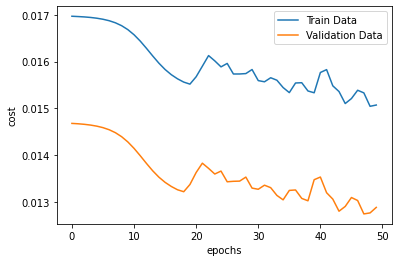

In [177]:
import matplotlib.pyplot as plt

plt.plot(cost_train[::], label="Train Data")
plt.plot(cost_test[::], label="Validation Data")
# print(np.max(current_percentage))
# plt.plot(current_percentage[:], label="Current Test")
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

[0.02654321 0.04096287 0.15396172 0.0090794  0.08552318 0.01419958
 0.60320746 0.02811866 0.01770079 0.02070313]
6


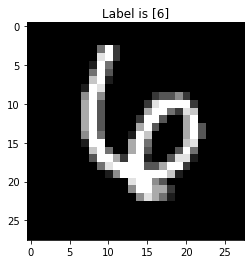

In [181]:
## Test
index = 22
single_label = np.where(y_test[index] == 1)[0]
single_Image = X_test[index].numpy()
single_Image_r = single_Image.reshape((28, 28))
test, _ = L_model_forward(single_Image, W, b)
print(test)
print(np.argmax(test))
plt.title('Label is {label}'.format(label=single_label))
plt.imshow(single_Image_r, cmap='gray')
plt.show()